<a href="https://colab.research.google.com/github/issacridhin/Advanced-Data-Analytics/blob/main/2348546_ImageFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
img = cv2.imread('tom.png')

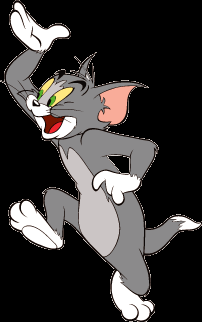

In [ ]:
cv2_imshow(img)

**Mean Filter**

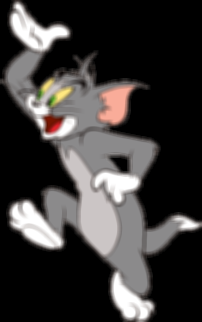

In [ ]:
kernel_mean = np.ones((5,5),np.float32)/25
mean_filtered_img = cv2.filter2D(img,-1,kernel_mean)
cv2_imshow(mean_filtered_img)

**Gaussian Filter**

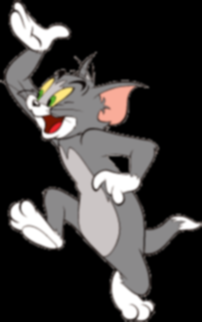

In [ ]:
gaussian_filtered = cv2.GaussianBlur(img,(5,5),0)
cv2_imshow(gaussian_filtered)

**Sobel Filter**

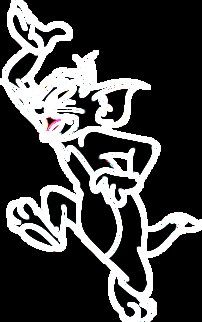

In [ ]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobel_filtered = np.hypot(sobelx,sobely)
cv2_imshow(sobel_filtered)

**Laplacian Filter**

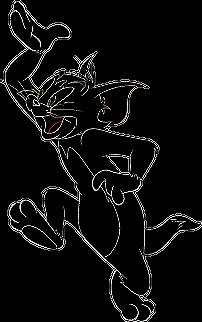

In [ ]:
laplacian_filtered = cv2.Laplacian(img,cv2.CV_64F)
cv2_imshow(laplacian_filtered)

**Median Filter**

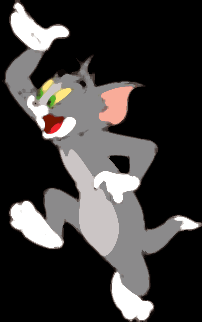

In [ ]:
median_filtered = cv2.medianBlur(img,5)
cv2_imshow(median_filtered)

**Bilateral Filter**

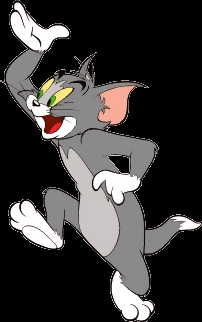

In [ ]:
bilateral_filtered = cv2.bilateralFilter(img,9,75,75)
cv2_imshow(bilateral_filtered)

In [ ]:
!unzip '/content/Reduced MNIST Data.zip'

Streaming output truncated to the last 5000 lines.
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4426.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4427.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4428.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4429.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4430.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4431.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4432.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4433.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4434.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4435.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4436.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4437.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4438.jpg  
 extracting: Reduced MNIST Data/Reduced Trainging data/5/4439.jpg

**SVC**

In [1]:
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import tensorflow as keras

In [ ]:
train_dir='../input/Reduced MNIST Data/Reduced Trainging data'
test_dir='../input/Reduced MNIST Data/Reduced Testing data'
train_list=[]
test_list=[]

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
#Normalise the images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
#Reshape tehe data to have a single channel
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

Using SVC without Filtering

In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)  # -1 infers the remaining dimension
x_test = x_test.reshape(x_test.shape[0], -1)

model = SVC(kernel='linear')
model.fit(x_train, y_train)
print(classification_report(y_test,model.predict(x_test)))
print('Accuracy:',accuracy_score(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Accuracy: 0.9404


**Preprocessing the image**

In [5]:
def apply_filters(images):
  mean_filtered = []
  median_filtered = []

  for img in images:
    img = img.squeeze()

    #Mean Filter
    mean_kernel = np.ones((3,3), np.float32)/9
    mean_filtered_img = cv2.filter2D(img,-1,mean_kernel)
    mean_filtered.append(mean_filtered_img)

    #Median Filter
    median_filtered_img = cv2.medianBlur(img,3)
    median_filtered.append(median_filtered_img)

  return mean_filtered, median_filtered

SVC using two Filters

In [6]:
# Preprocess the training and testing data
train_mean_filtered, train_median_filtered = apply_filters(x_train)
test_mean_filtered, test_median_filtered = apply_filters(x_test)

# Reshape the filtered data
train_mean_filtered = np.array(train_mean_filtered).reshape(np.array(train_mean_filtered).shape[0], -1)
train_median_filtered = np.array(train_median_filtered).reshape(np.array(train_median_filtered).shape[0], -1)
test_mean_filtered = np.array(test_mean_filtered).reshape(np.array(test_mean_filtered).shape[0], -1)
test_median_filtered = np.array(test_median_filtered).reshape(np.array(test_median_filtered).shape[0], -1)

# Train and evaluate the model with mean filtered data
model_mean = SVC(kernel='linear')
model_mean.fit(train_mean_filtered, y_train)
print("SVC with Mean Filtering:")
print(classification_report(y_test, model_mean.predict(test_mean_filtered)))
print('Accuracy:', accuracy_score(y_test, model_mean.predict(test_mean_filtered)))

# Train and evaluate the model with median filtered data
model_median = SVC(kernel='linear')
model_median.fit(train_median_filtered, y_train)
print("SVC with Median Filtering:")
print(classification_report(y_test, model_median.predict(test_median_filtered)))
print('Accuracy:', accuracy_score(y_test, model_median.predict(test_median_filtered)))

SVC with Mean Filtering:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.94      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.93      0.91      0.92       892
           6       0.96      0.96      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Accuracy: 0.9459
SVC with Median Filtering:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.99      0.98      1135
         